In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# VQA Rad Data Analysis

In [2]:
path_rad = r"E:\Research_Paper\major\Data\VQA_RAD_Data.xlsx"
data_rad = pd.read_excel(path_rad)
data_rad = data_rad.drop(['QID_unique', 'QID_para','QID_linked','IMAGEID_case','IMAGEID','EVALUATION','Q_REPHASE','Q_RELATION','Q_FRAMED'], axis = 1)
print("Number of QA pairs:",data_rad.shape[0])
data_rad.isnull().sum()

Number of QA pairs: 2248


IMAGEORGAN    0
QUESTION      0
Q_TYPE        0
ANSWER        0
A_TYPE        0
dtype: int64

In [3]:
cols = data_rad.columns
print(cols)

#Unique values in each column
organ = pd.unique(data_rad['IMAGEORGAN'])
q_type = pd.unique(data_rad['Q_TYPE'])
a_type = pd.unique(data_rad['A_TYPE'])

print("Organ_type:",organ,"\nQues_type:",q_type,"\nAns_type:",a_type)

Index(['IMAGEORGAN', 'QUESTION', 'Q_TYPE', 'ANSWER', 'A_TYPE'], dtype='object')
Organ_type: ['HEAD' 'CHEST' 'ABD'] 
Ques_type: ['PRES' 'ABN' 'MODALITY' 'ORGAN' 'POS' 'PLANE' 'OTHER' 'SIZE, PRES' 'SIZE'
 'COUNT' 'ATTRIB' 'ATTRIB, SIZE' 'PRES, ABN' 'COLOR' 'PRES, POS'
 'ATTRIB, PRES' 'Other' 'COLOR, PRES' 'POS, PRES' 'PRES, ATTRIB'
 'POS, ABN' 'ABN, POS' 'SIZE, COLOR' 'PRES, COLOR' 'ATRIB' 'PRSE'] 
Ans_type: ['CLOSED' 'OPEN']


In [4]:
#Frequency distribution of uniques values in column
data_rad['IMAGEORGAN'].describe()
count_organ = data_rad['IMAGEORGAN'].value_counts()

data_rad['Q_TYPE'].describe()
count_ques = data_rad['Q_TYPE'].value_counts()

data_rad['A_TYPE'].describe()
count_ans = data_rad['A_TYPE'].value_counts()

CHEST    794
ABD      739
HEAD     715
Name: IMAGEORGAN, dtype: int64


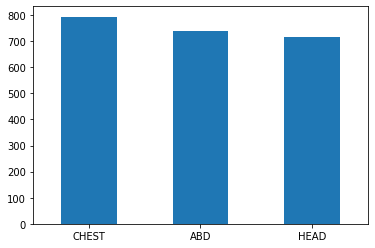

In [5]:
#Plotting frequency of organ type
print(count_organ)
count_organ.plot(x=organ, kind="bar", rot = 0, fontsize=10)

PRES            800
POS             316
ABN             202
OTHER           194
MODALITY        185
SIZE            171
PLANE           120
ATTRIB           87
ORGAN            59
COLOR            52
COUNT            24
POS, PRES         6
PRES, ATTRIB      6
ATTRIB, PRES      4
PRES, POS         4
ABN, POS          3
POS, ABN          2
Other             2
SIZE, PRES        2
SIZE, COLOR       2
COLOR, PRES       2
PRES, ABN         1
PRES, COLOR       1
ATRIB             1
ATTRIB, SIZE      1
PRSE              1
Name: Q_TYPE, dtype: int64


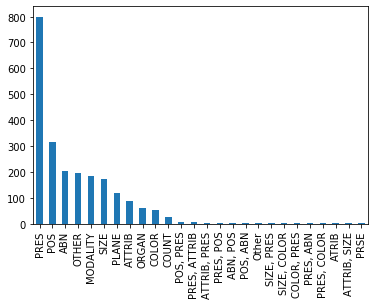

In [6]:
#Plotting frequency of question type
print(count_ques)
count_ques.plot(x=q_type, kind="bar", fontsize=10)

CLOSED    1299
OPEN       949
Name: A_TYPE, dtype: int64


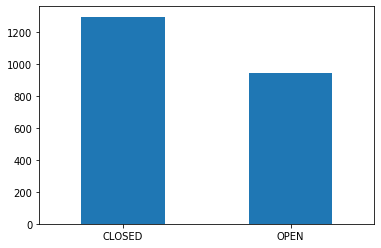

In [7]:
#Plotting frequency of answer type
print(count_ans)
count_ans.plot(x=a_type, kind="bar", rot = 0, fontsize=10)

Min length of ans: 2.0  frequency: 646.0 
Max length of ans: 118.0  frequency: 1.0


Text(0, 0.5, 'Frequency')

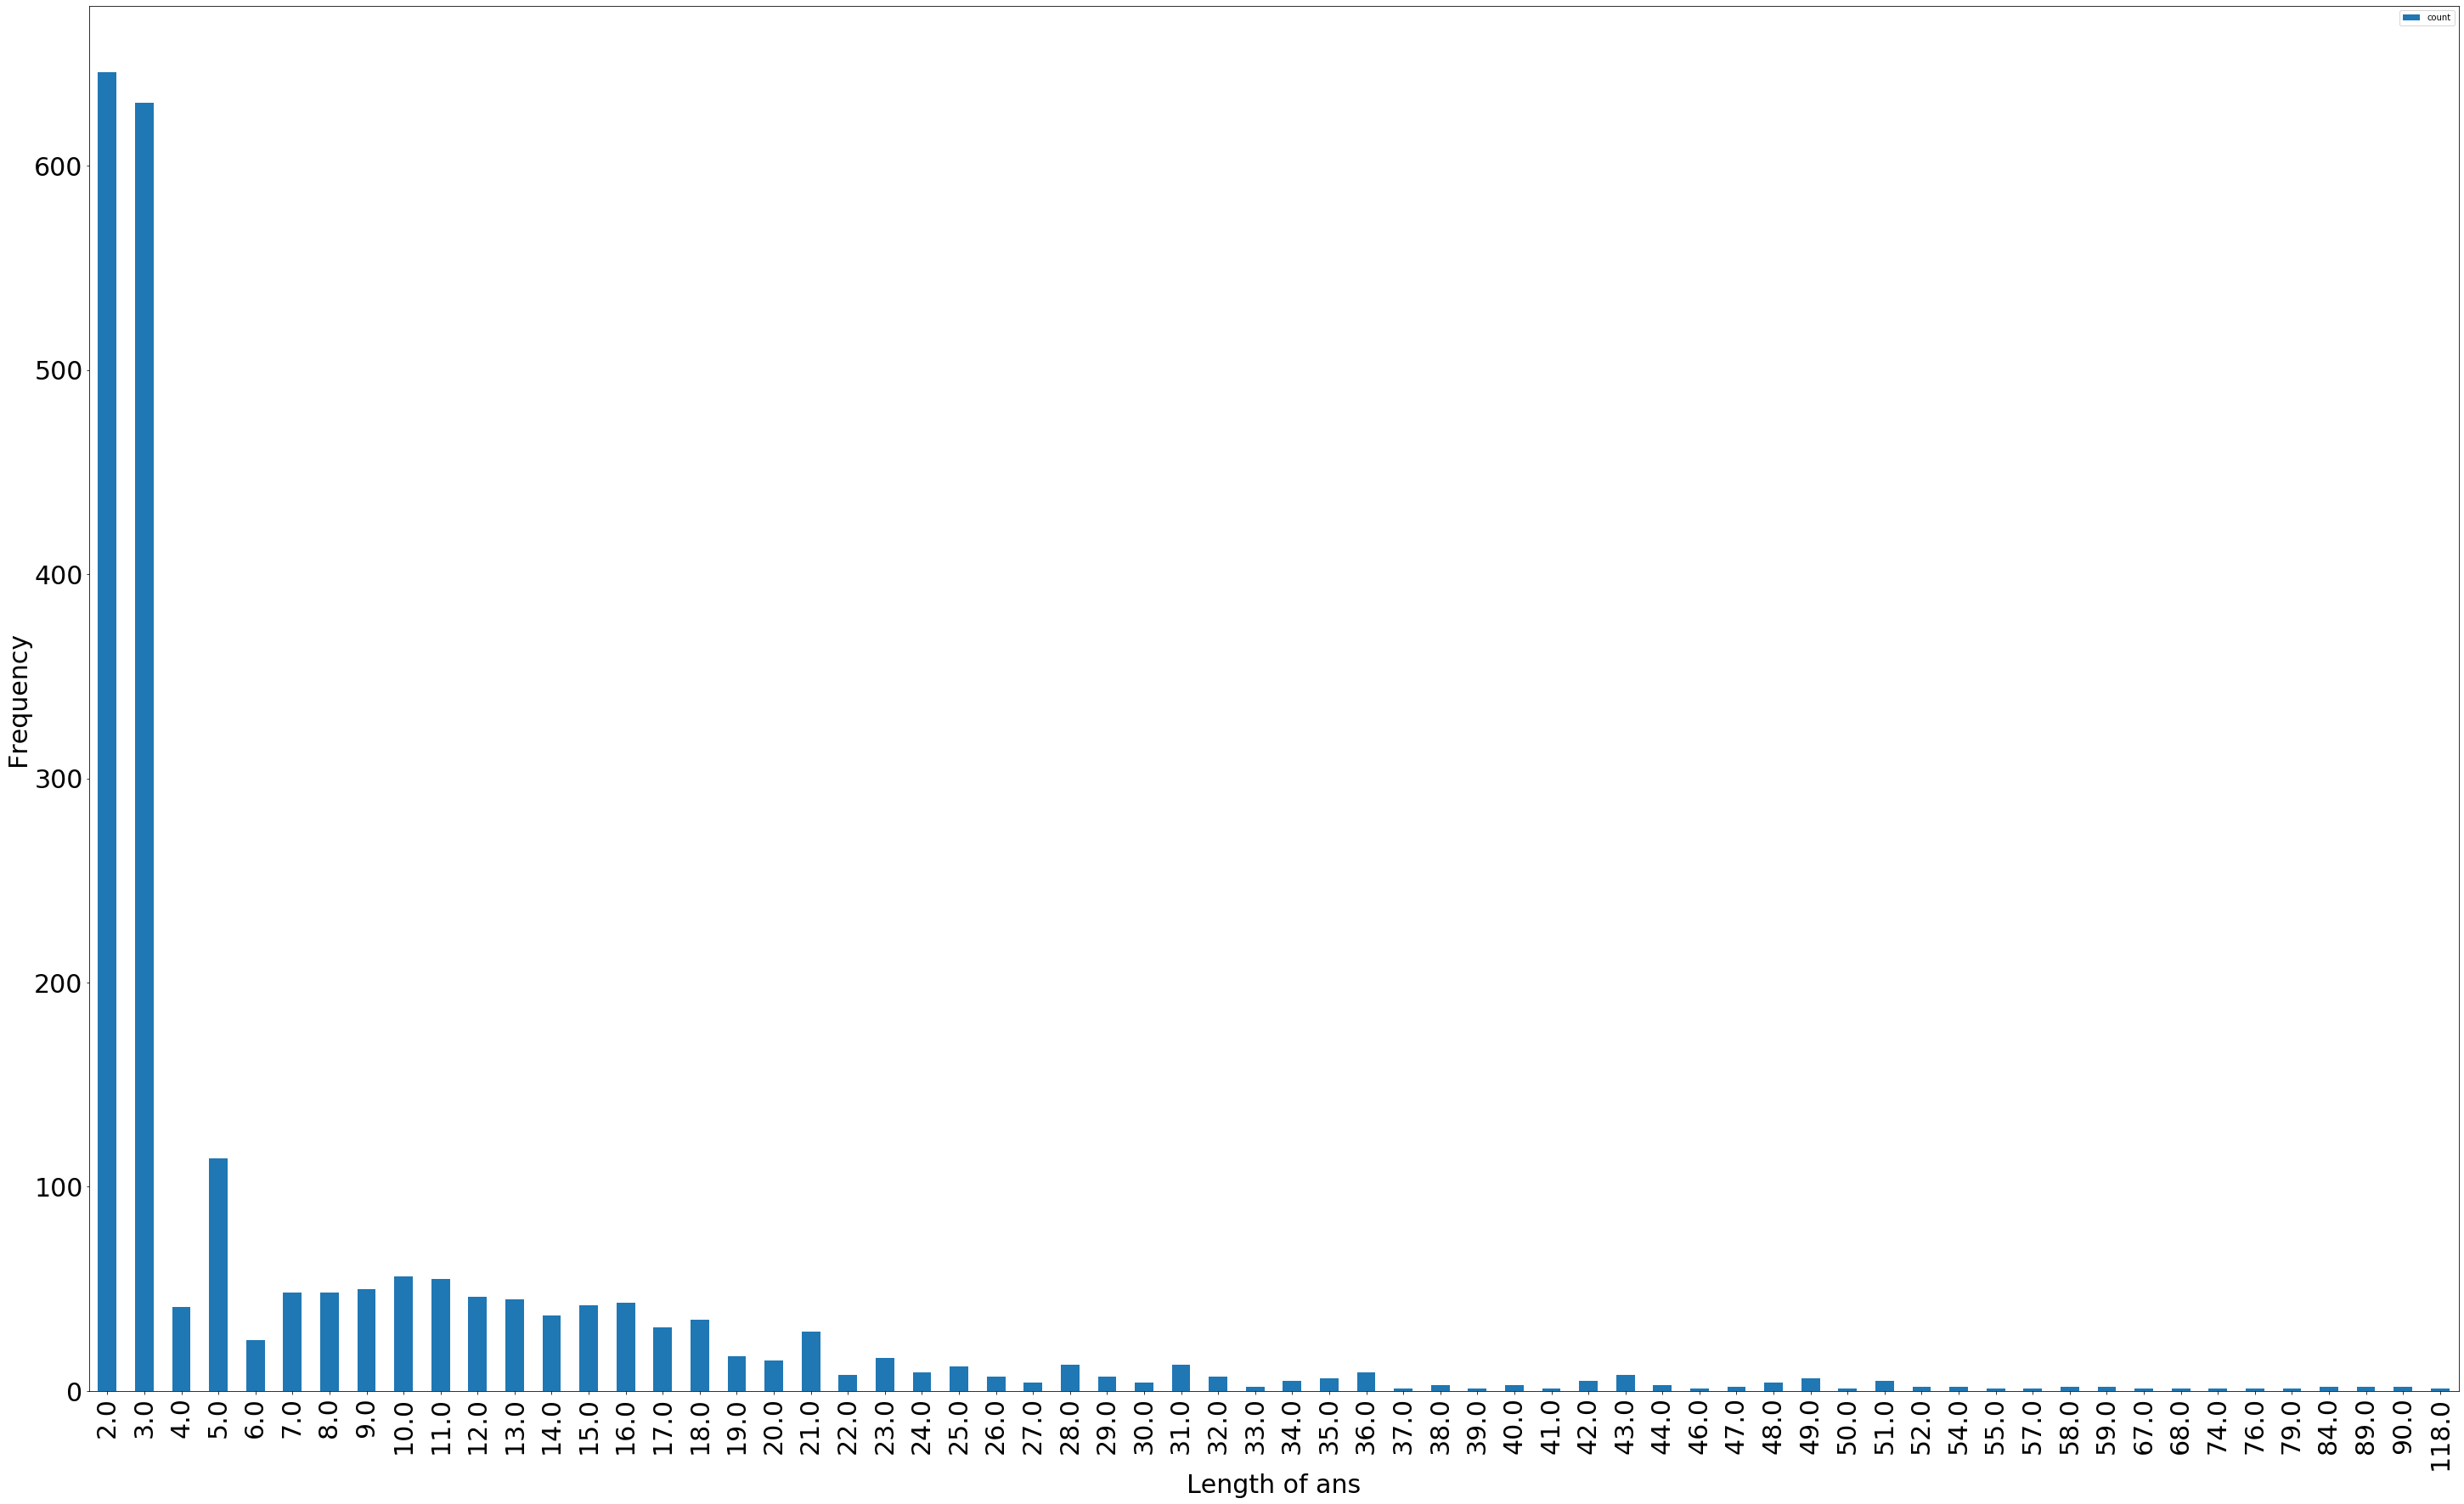

In [9]:
#Length Distribution of answers

ans_len = data_rad["ANSWER"].str.len()
x=np.sort(pd.unique(ans_len))
y=ans_len.value_counts().sort_values(ascending = False)
dy = y.to_frame().reset_index()
dy.columns = ['length','count']
dy.sort_values("length", axis = 0, ascending = True, 
                 inplace = True) 

print("Min length of ans:",dy.iloc[0]['length']," frequency:",dy.iloc[0]['count'],"\nMax length of ans:",dy.iloc[63]['length']," frequency:",dy.iloc[63]['count'])

ax = dy.plot(x='length',y='count',kind="bar",figsize=(50,30),fontsize=30)
ax.set_xlabel("Length of ans",fontdict={'fontsize':30})
ax.set_ylabel("Frequency",fontdict={'fontsize':30})

Text(0, 0.5, 'Frequency')

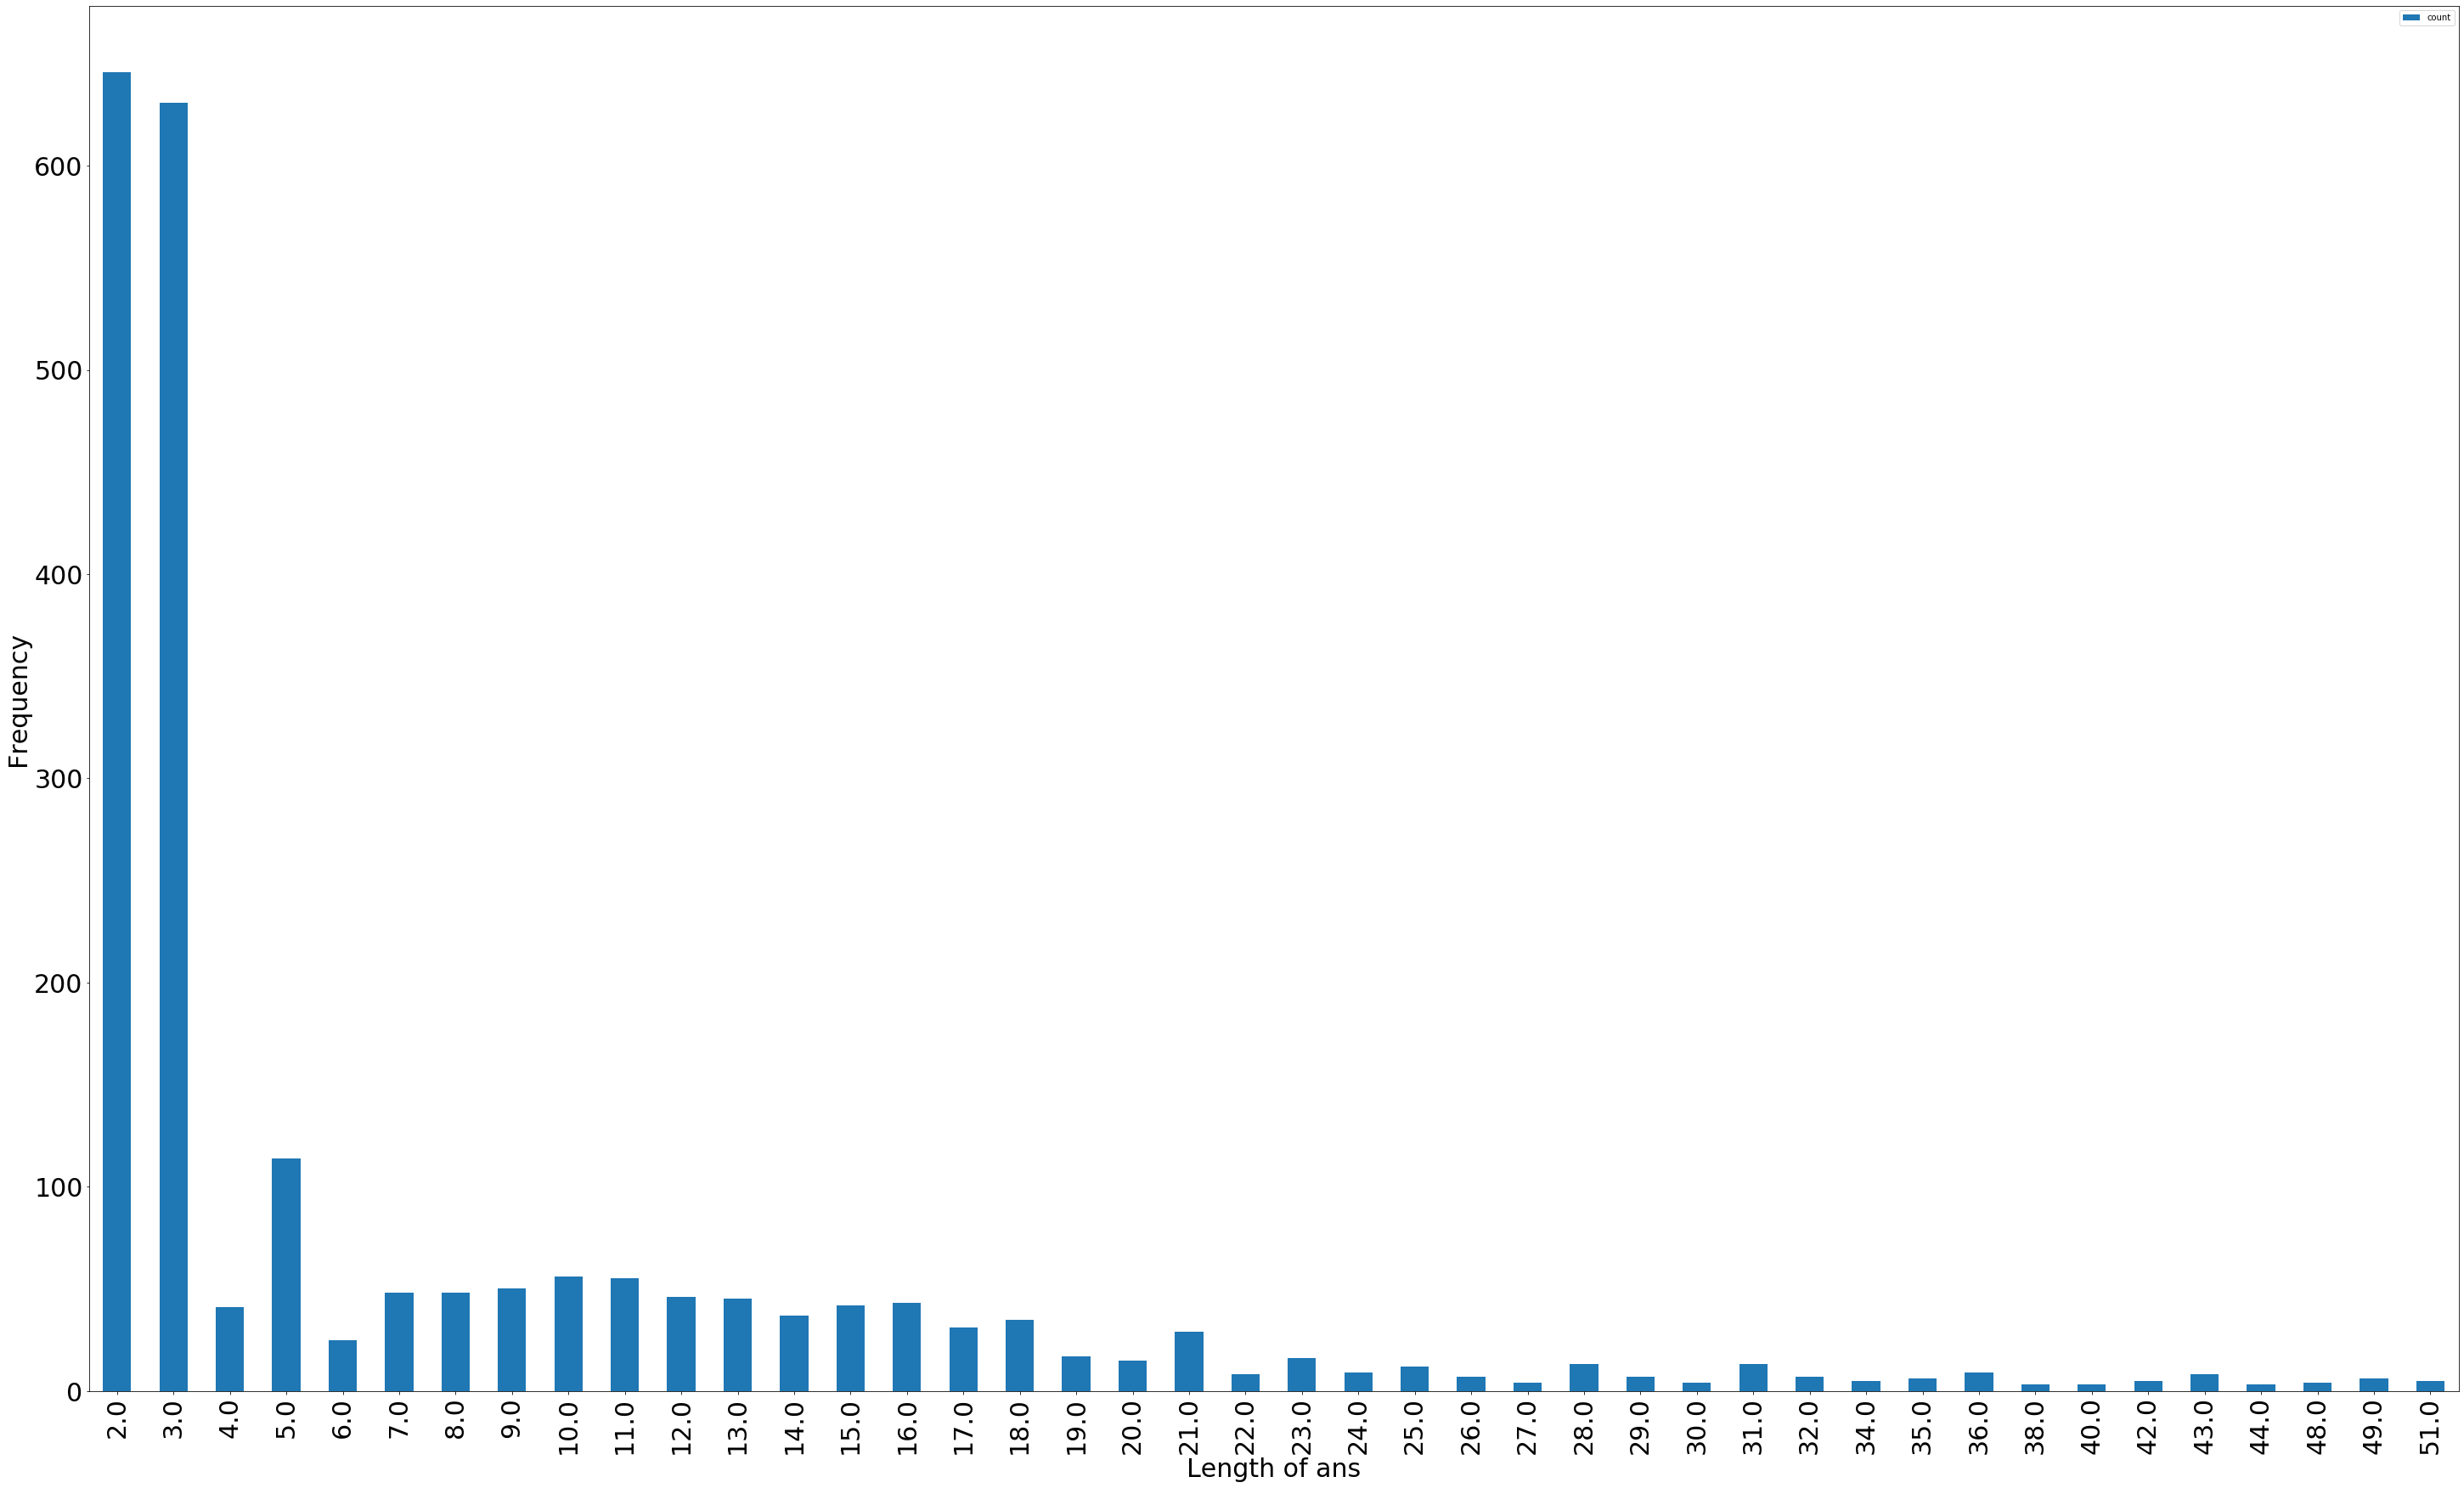

In [10]:
#Plot where freq of length is greater than 2
df3 = dy[dy['count'] > 2]
df3.shape

ax = df3.plot(x='length',y='count',kind="bar",figsize=(50,30),fontsize=30)
ax.set_xlabel("Length of ans",fontdict={'fontsize':30})
ax.set_ylabel("Frequency",fontdict={'fontsize':30})

# VQA-Med 2019 (Training)

In [11]:
path_med_train = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Training\ImageClef-2019-VQA-Med-Training\All_QA_Pairs_train.txt"
data_train = pd.read_csv(path_med_train,delimiter = '|')
data_train.columns = ['Image', 'Ques', 'Ans'] 
print("Number of QA pairs:",data_train.shape[0])
data_train.isnull().sum()

Number of QA pairs: 12791


Image    0
Ques     0
Ans      0
dtype: int64

In [12]:
path_t1 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Training\ImageClef-2019-VQA-Med-Training\QAPairsByCategory\C1_Modality_train.txt"
data_t1 = pd.read_csv(path_t1,delimiter = '|')
data_t1.columns = ['Image', 'Ques', 'Ans'] 
data_t1['Type'] = 'Modality'
print("Number of QA pairs:",data_t1.shape[0])
data_t1.isnull().sum()

Number of QA pairs: 3199


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [13]:
path_t2 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Training\ImageClef-2019-VQA-Med-Training\QAPairsByCategory\C2_Plane_train.txt"
data_t2 = pd.read_csv(path_t2,delimiter = '|')
data_t2.columns = ['Image', 'Ques', 'Ans'] 
data_t2['Type'] = 'Plane'
print("Number of QA pairs:",data_t2.shape[0])
data_t2.isnull().sum()

Number of QA pairs: 3199


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [14]:
path_t3 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Training\ImageClef-2019-VQA-Med-Training\QAPairsByCategory\C3_Organ_train.txt"
data_t3 = pd.read_csv(path_t3,delimiter = '|')
data_t3.columns = ['Image', 'Ques', 'Ans'] 
data_t3['Type'] = 'Organ'
print("Number of QA pairs:",data_t3.shape[0])
data_t3.isnull().sum()

Number of QA pairs: 3199


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [15]:
path_t4 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Training\ImageClef-2019-VQA-Med-Training\QAPairsByCategory\C4_Abnormality_train.txt"
data_t4 = pd.read_csv(path_t4,delimiter = '|')
data_t4.columns = ['Image', 'Ques', 'Ans'] 
data_t4['Type'] = 'Abnormality'
print("Number of QA pairs:",data_t4.shape[0])
data_t4.isnull().sum()

Number of QA pairs: 3191


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [16]:
train = data_t1
train = train.append(data_t2)
train = train.append(data_t3)
train = train.append(data_t4)
train.shape

(12788, 4)

Modality       3199
Organ          3199
Plane          3199
Abnormality    3191
Name: Type, dtype: int64


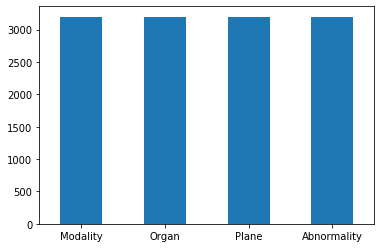

In [17]:
#Abnormality types
ab_type = pd.unique(train['Type'])
count_ab = train['Type'].value_counts()

#Plotting frequency of abnormality type
print(count_ab)
count_ab.plot(x=ab_type, kind="bar", rot = 0, fontsize=10)

In [18]:
#Frequency of answers in QA pairs

train.head(10)
ans = pd.unique(train['Ans'])
count = train['Ans'].value_counts()
count = count.to_frame().reset_index()
count.columns = ['ans','count']

print("Frequency of each answer:")
count.head(10)

Frequency of each answer:


,ans,count
0,axial,1557
1,skull and contents,1216
2,no,679
3,yes,615
4,sagittal,478
5,xr - plain film,456
6,musculoskeletal,436
7,coronal,389
8,gastrointestinal,352
9,"lung, mediastinum, pleura",249


(99, 2) 
Min length of ans: 2  frequency: 7 
Max length of ans: 161  frequency: 1


Text(0, 0.5, 'Frequency')

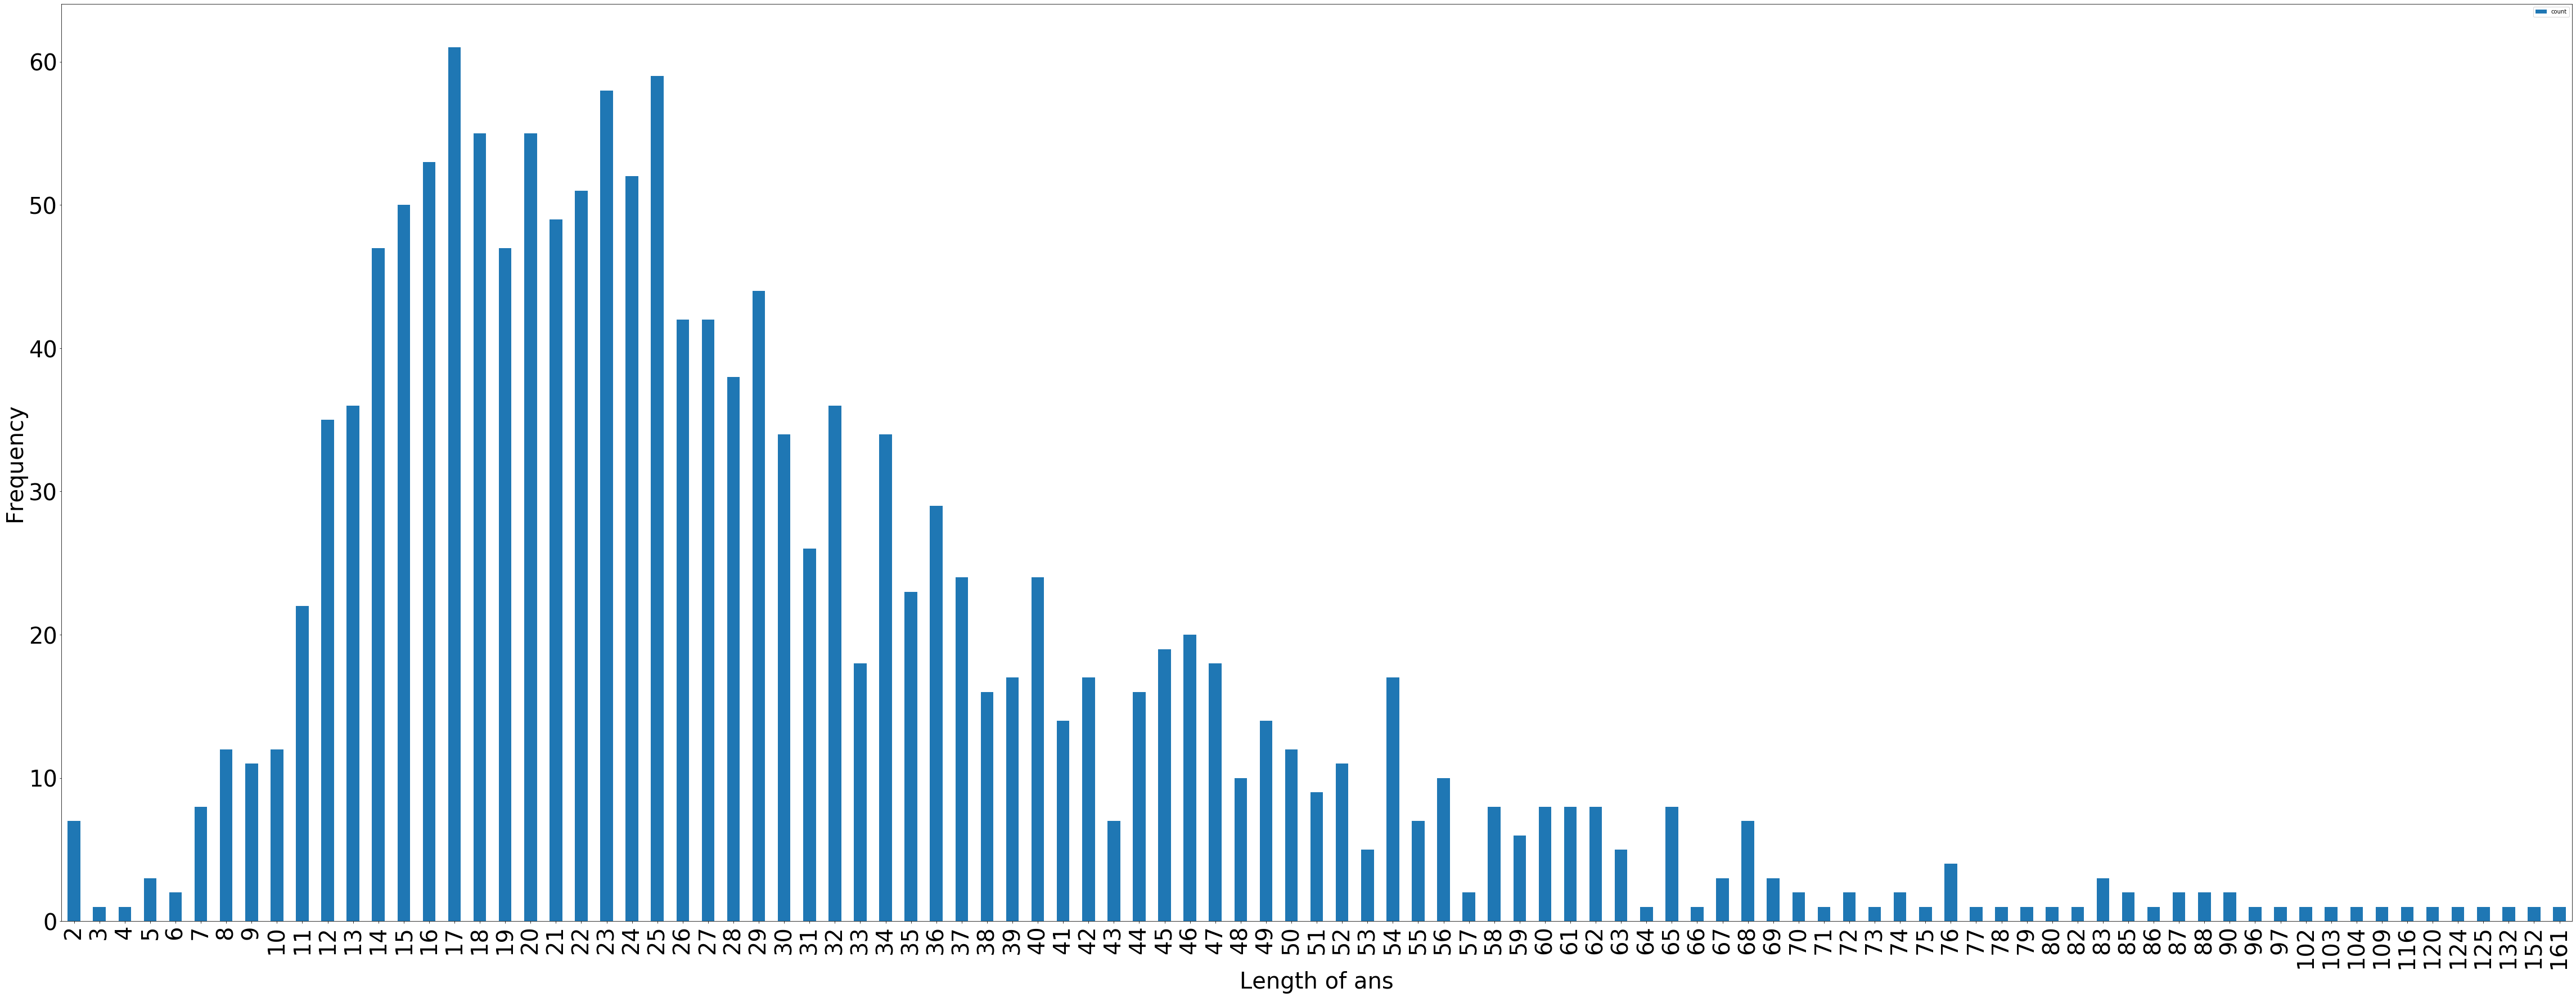

In [19]:
#Length Distribution of answers

ans_train = count["ans"].str.len()
x=np.sort(pd.unique(ans_train))
y=ans_train.value_counts().sort_values(ascending = False)
dy = y.to_frame().reset_index()
dy.columns = ['length','count']
dy.sort_values("length", axis = 0, ascending = True, 
                 inplace = True) 
print(dy.shape,"\nMin length of ans:",dy.iloc[0]['length']," frequency:",dy.iloc[0]['count'],"\nMax length of ans:",dy.iloc[98]['length']," frequency:",dy.iloc[98]['count'])

ax = dy.plot(x='length',y='count',kind="bar",figsize=(80,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})

Text(0, 0.5, 'Frequency')

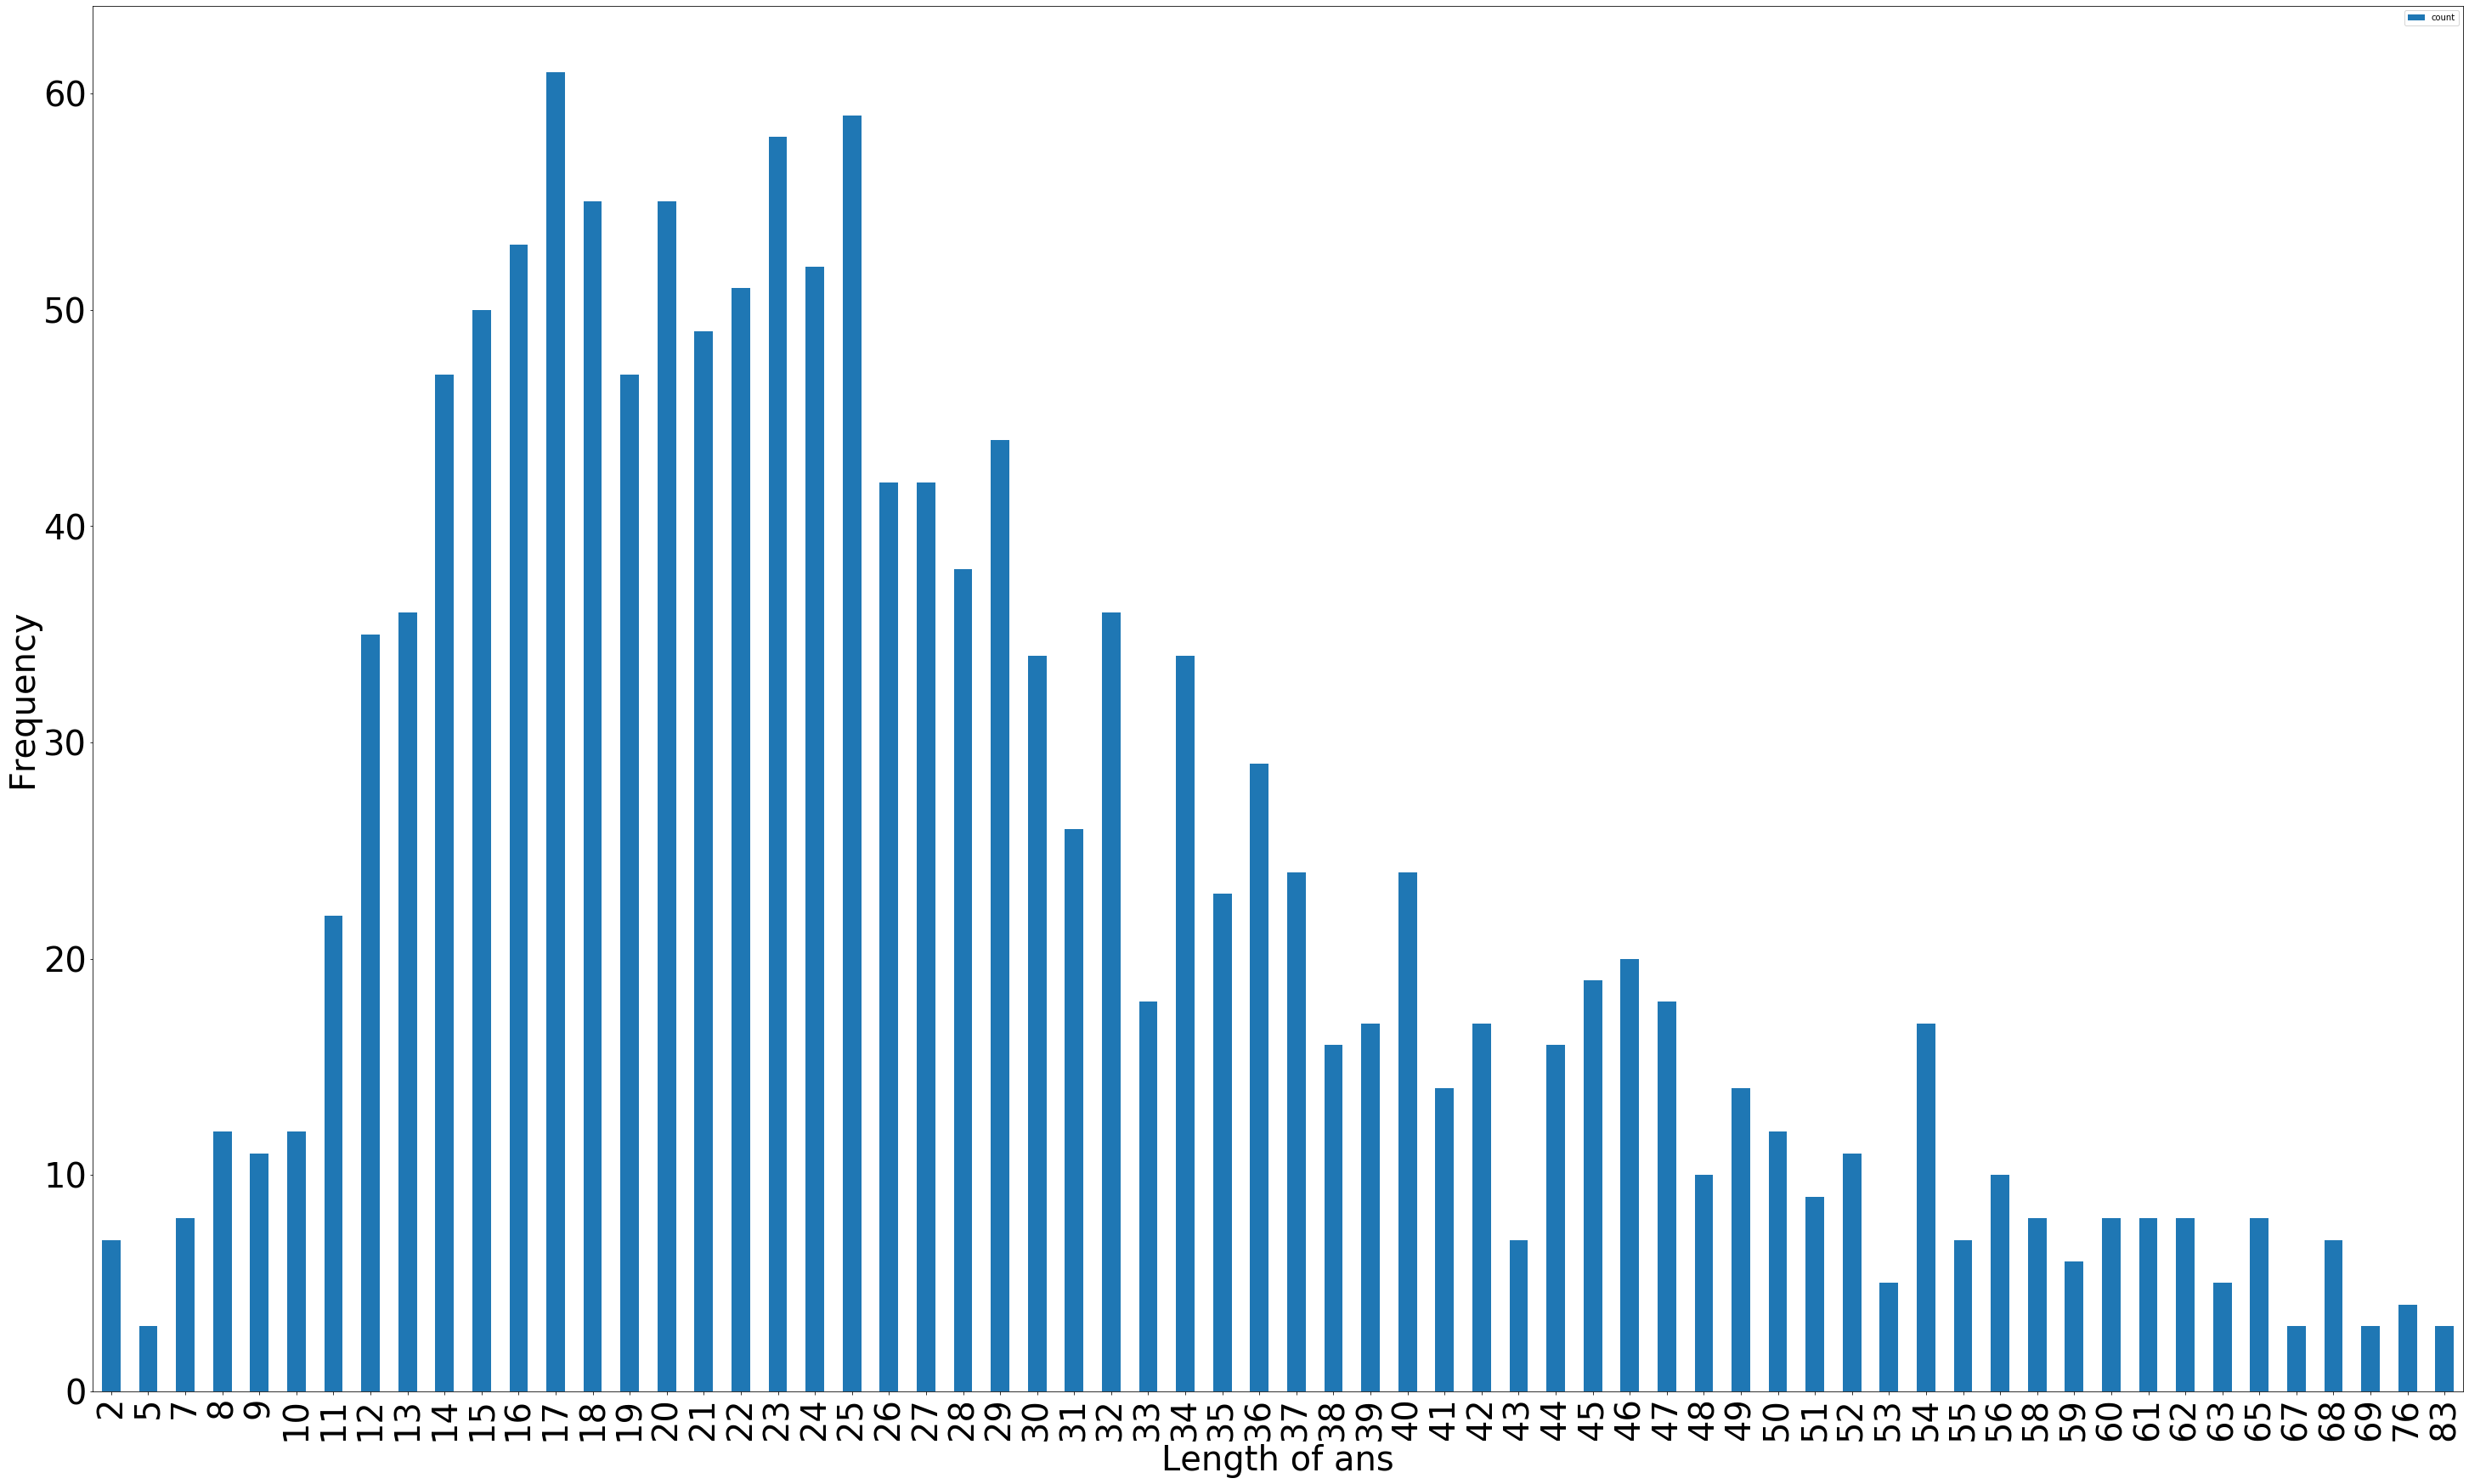

In [20]:
#Plot where freq of length is greater than 2
df3 = dy[dy['count'] > 2]
df3.shape

ax = df3.plot(x='length',y='count',kind="bar",figsize=(50,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})

# VQA-Med 2019 (Validation)

In [21]:
path_med_val = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Validation\ImageClef-2019-VQA-Med-Validation\All_QA_Pairs_val.txt"
data_val = pd.read_csv(path_med_val,delimiter = '|')
data_val.columns = ['Image', 'Ques', 'Ans'] 
print("Number of QA pairs:",data_val.shape[0])
data_val.isnull().sum()

Number of QA pairs: 1999


Image    0
Ques     0
Ans      0
dtype: int64

In [22]:
path_v1 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Validation\ImageClef-2019-VQA-Med-Validation\QAPairsByCategory\C1_Modality_val.txt"
data_v1 = pd.read_csv(path_v1,delimiter = '|')
data_v1.columns = ['Image', 'Ques', 'Ans'] 
data_v1['Type'] = 'Modality'
print("Number of QA pairs:",data_v1.shape[0])
data_v1.isnull().sum()

Number of QA pairs: 499


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [23]:
path_v2 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Validation\ImageClef-2019-VQA-Med-Validation\QAPairsByCategory\C2_Plane_val.txt"
data_v2 = pd.read_csv(path_v2,delimiter = '|')
data_v2.columns = ['Image', 'Ques', 'Ans'] 
data_v2['Type'] = 'Plane'
print("Number of QA pairs:",data_v2.shape[0])
data_v2.isnull().sum()

Number of QA pairs: 499


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [24]:
path_v3 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Validation\ImageClef-2019-VQA-Med-Validation\QAPairsByCategory\C3_Organ_val.txt"
data_v3 = pd.read_csv(path_v3,delimiter = '|')
data_v3.columns = ['Image', 'Ques', 'Ans'] 
data_v3['Type'] = 'Organ'
print("Number of QA pairs:",data_v3.shape[0])
data_v3.isnull().sum()

Number of QA pairs: 499


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [25]:
path_v4 = r"E:\Research_Paper\major\Data\ImageClef-2019-VQA-Med-Validation\ImageClef-2019-VQA-Med-Validation\QAPairsByCategory\C4_Abnormality_val.txt"
data_v4 = pd.read_csv(path_v4,delimiter = '|')
data_v4.columns = ['Image', 'Ques', 'Ans'] 
data_v4['Type'] = 'Abnormality'
print("Number of QA pairs:",data_v4.shape[0])
data_v4.isnull().sum()

Number of QA pairs: 499


Image    0
Ques     0
Ans      0
Type     0
dtype: int64

In [26]:
val = data_v1
val = val.append(data_v2)
val = val.append(data_v3)
val = val.append(data_v4)
val.shape

(1996, 4)

Abnormality    499
Modality       499
Plane          499
Organ          499
Name: Type, dtype: int64


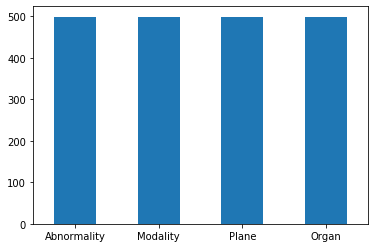

In [27]:
#Abnormality types
ab_type = pd.unique(val['Type'])
count_ab = val['Type'].value_counts()

#Plotting frequency of abnormality type
print(count_ab)
count_ab.plot(x=ab_type, kind="bar", rot = 0, fontsize=10)

In [28]:
#Frequency of answers in QA pairs

val.head(10)
ans_v = pd.unique(val['Ans'])
count_val = val['Ans'].value_counts()
count_val = count_val.to_frame().reset_index()
count_val.columns = ['ans','count']

print("Frequency of each answer:")
count_val.head(10)

Frequency of each answer:


,ans,count
0,axial,212
1,skull and contents,177
2,no,122
3,xr - plain film,86
4,sagittal,81
5,yes,80
6,musculoskeletal,76
7,coronal,65
8,gastrointestinal,59
9,spine and contents,47


(72, 2) 
Min length of ans: 2  frequency: 7 
Max length of ans: 126  frequency: 1


Text(0, 0.5, 'Frequency')

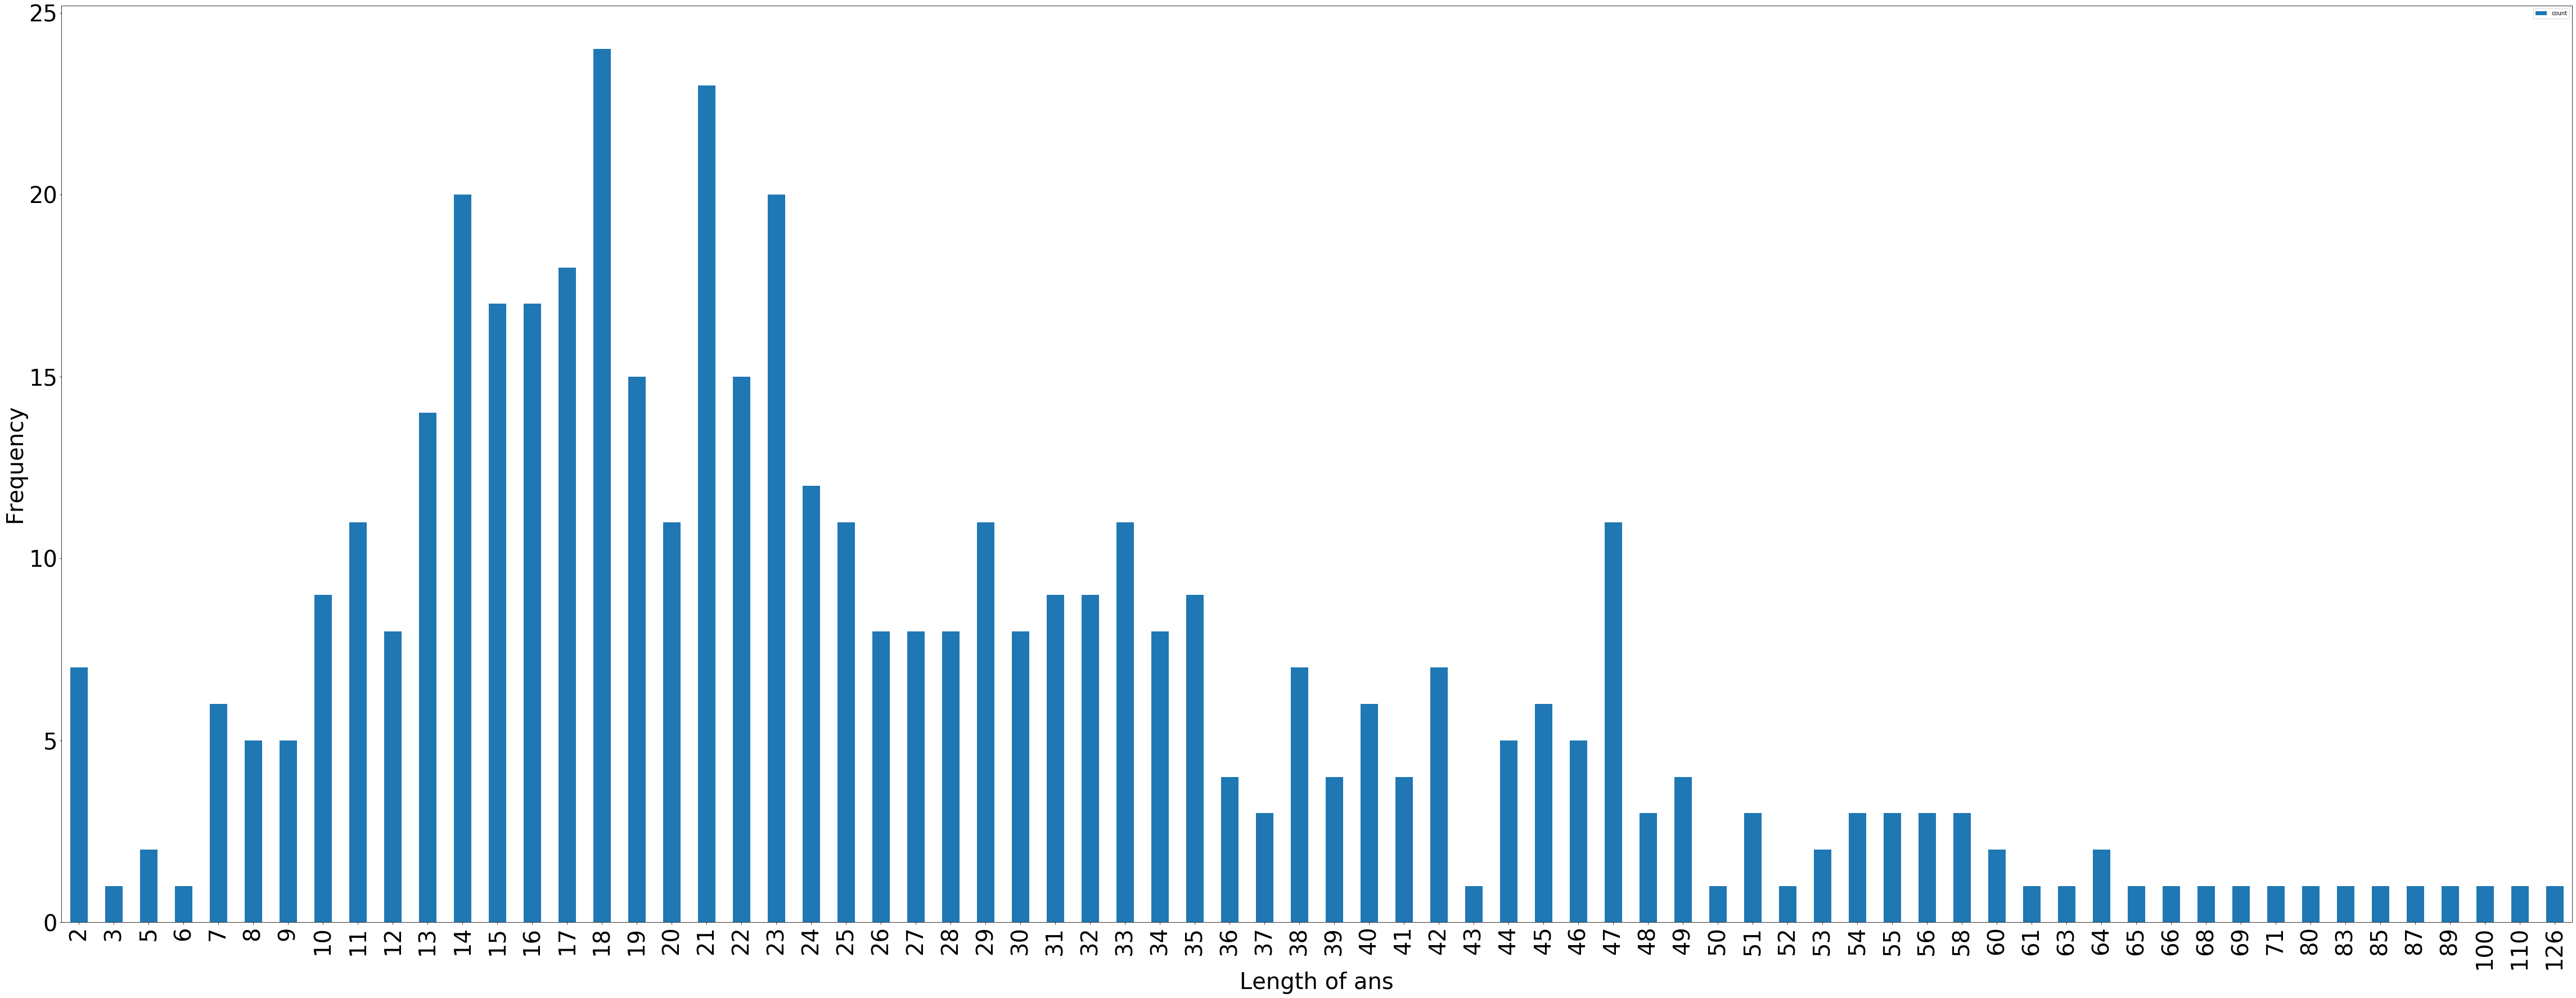

In [29]:
#Length Distribution of answers

ans_val = count_val["ans"].str.len()

x=np.sort(pd.unique(ans_val))
y=ans_val.value_counts().sort_values(ascending = False)
dy = y.to_frame().reset_index()
dy.columns = ['length','count']
dy.sort_values("length", axis = 0, ascending = True, 
                 inplace = True) 
print(dy.shape,"\nMin length of ans:",dy.iloc[0]['length']," frequency:",dy.iloc[0]['count'],"\nMax length of ans:",dy.iloc[71]['length']," frequency:",dy.iloc[71]['count'])

ax = dy.plot(x='length',y='count',kind="bar",figsize=(80,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})

Text(0, 0.5, 'Frequency')

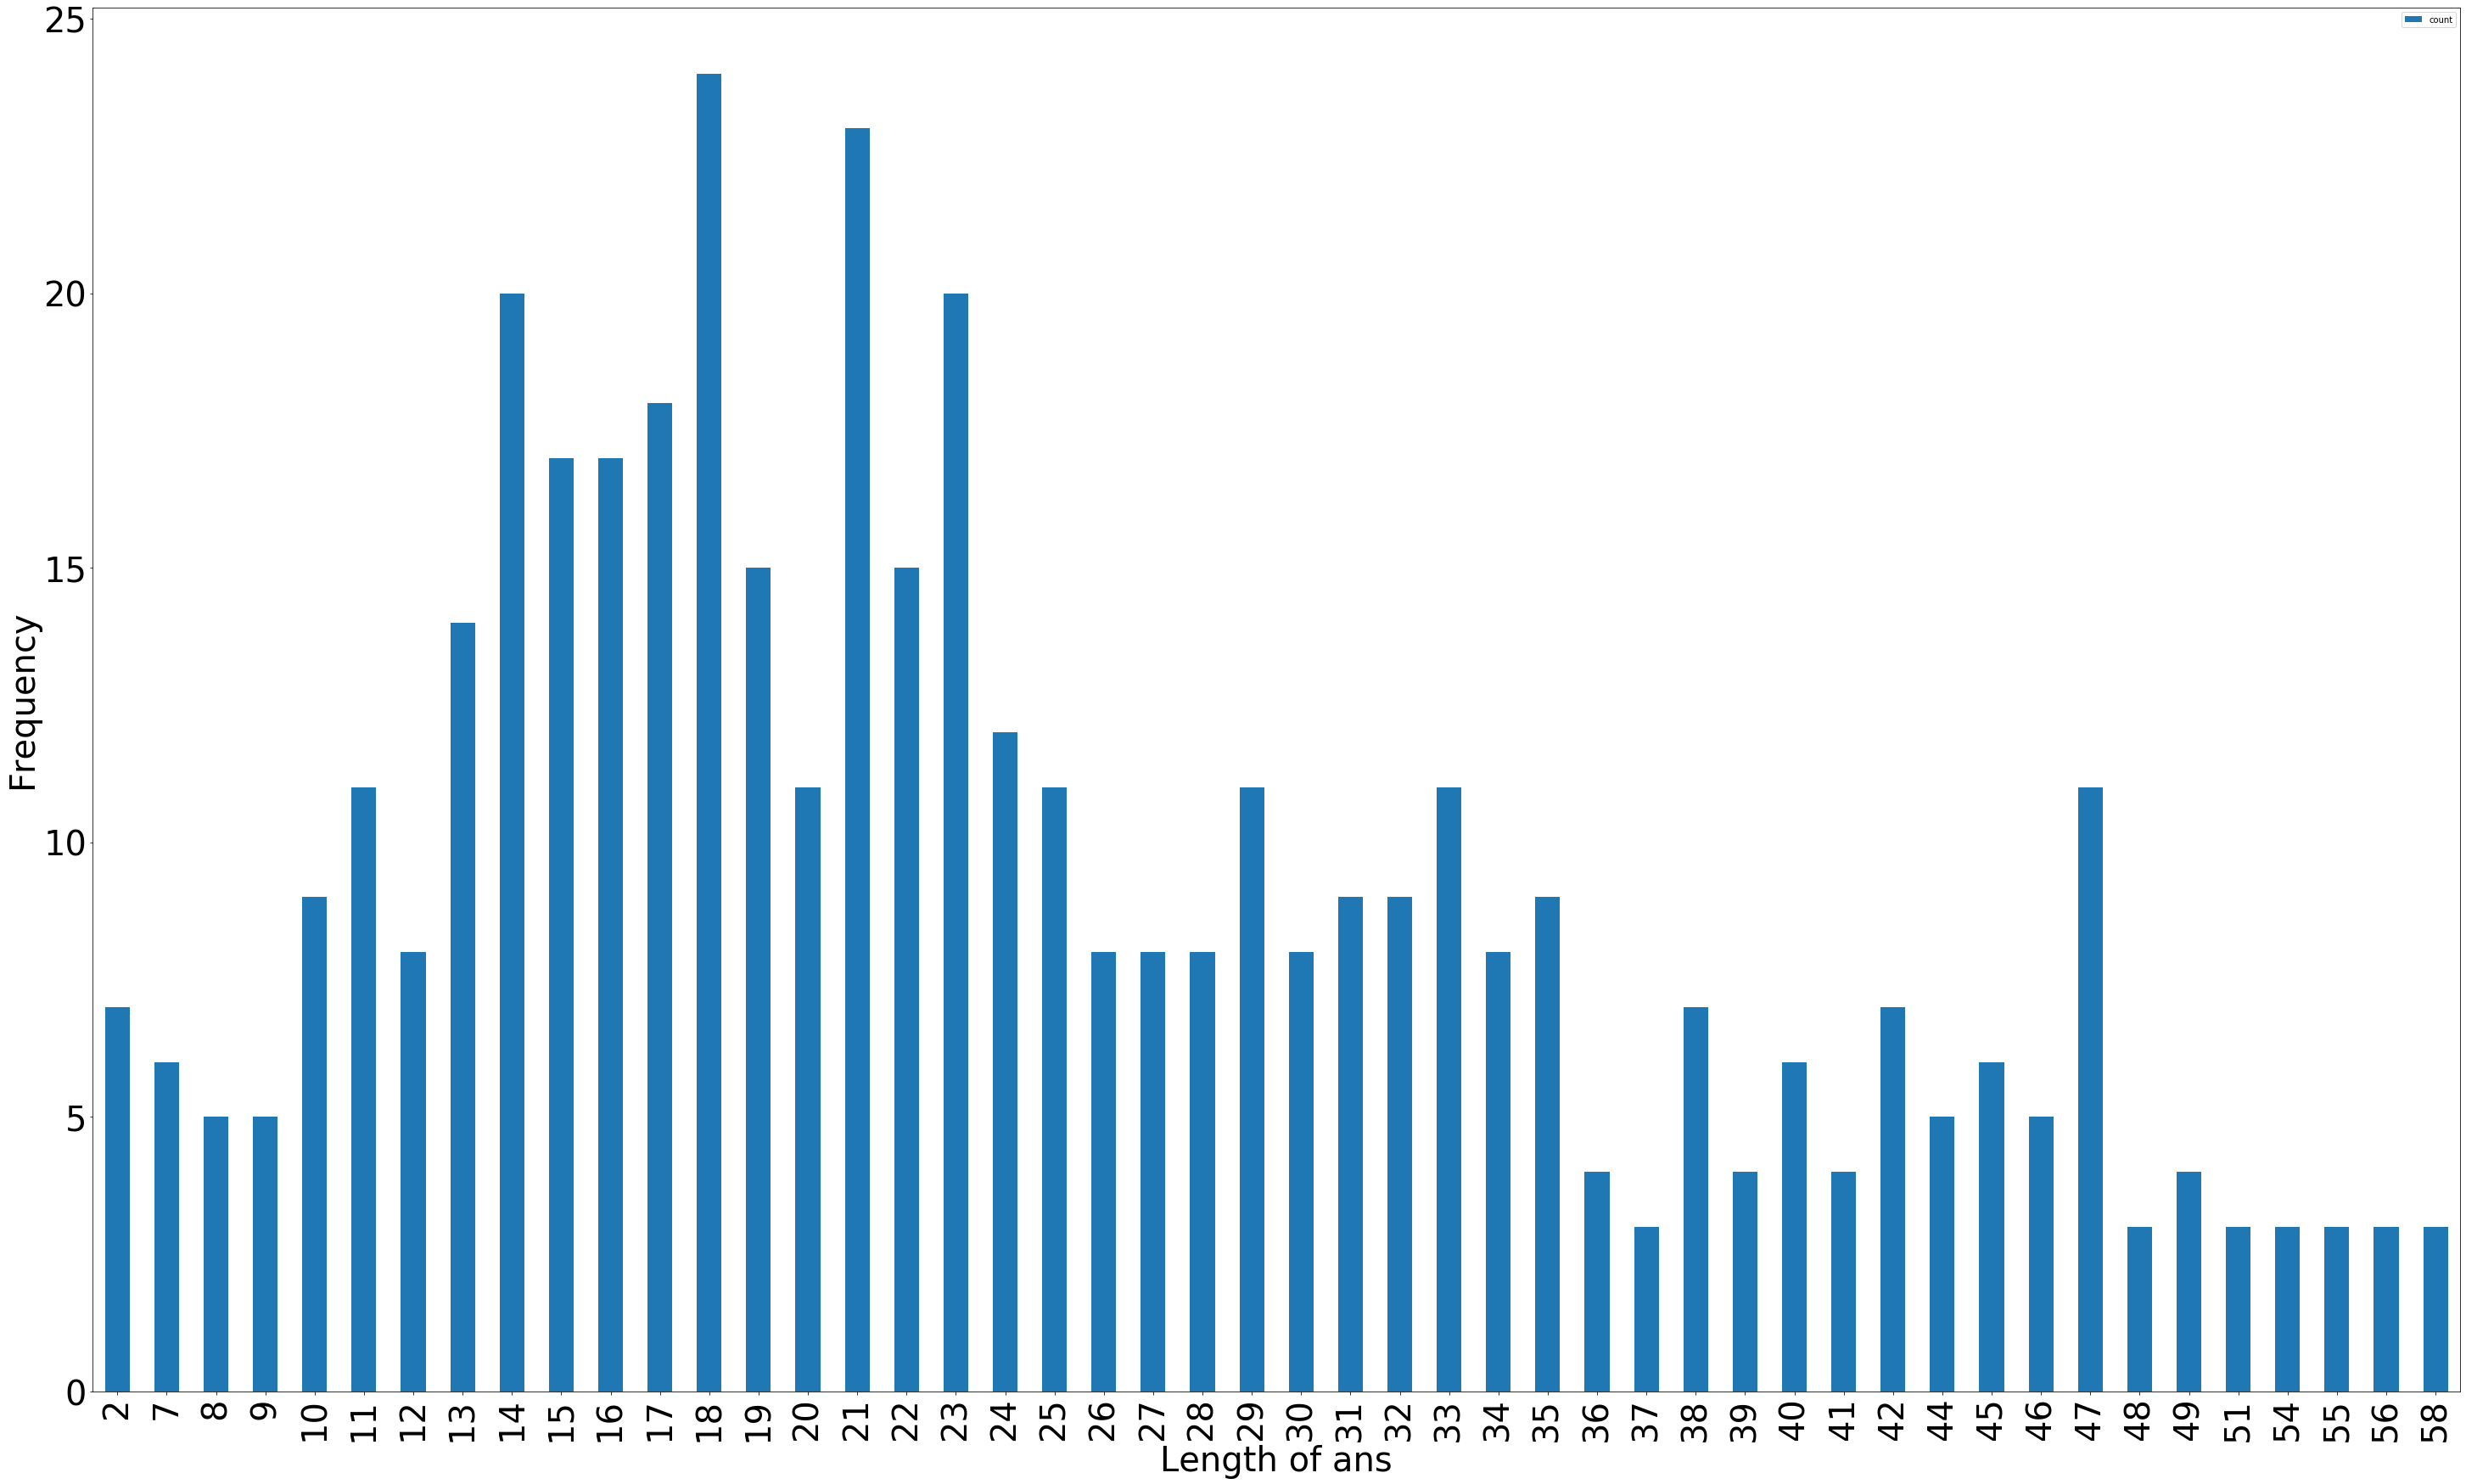

In [30]:
#Plot where freq of length is greater than 2
df3 = dy[dy['count'] > 2]
df3.shape

ax = df3.plot(x='length',y='count',kind="bar",figsize=(50,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})

# VQA-Med 2019 (Testing)

In [31]:
path_med_test = r"E:\Research_Paper\major\Data\VQA-Med-2019-master\VQA-Med-2019-master\VQAMed2019Test\VQAMed2019_Test_Questions_Answers.txt"
data_test = pd.read_csv(path_med_test,delimiter = '|')
data_test.columns = ['Image', 'Type','Ques', 'Ans'] 
print("Number of QA pairs:",data_test.shape[0])
data_test.isnull().sum()

Number of QA pairs: 499


Image    0
Type     0
Ques     0
Ans      0
dtype: int64

abnormality    125
organ          125
plane          125
modality       124
Name: Type, dtype: int64


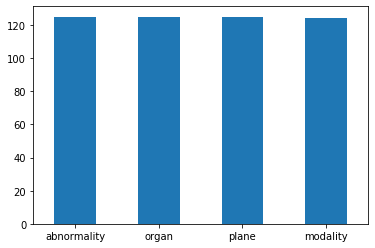

In [32]:
#Abnormality types
ab_type = pd.unique(data_test['Type'])
count_ab = data_test['Type'].value_counts()

#Plotting frequency of abnormality type
print(count_ab)
count_ab.plot(x=ab_type, kind="bar", rot = 0, fontsize=10)

In [33]:
#Frequency of answers in QA pairs

data_test.head(10)

count_test = data_test['Ans'].value_counts()
count_test = count_test.to_frame().reset_index()
count_test.columns = ['ans','count']

print("Frequency of each answer:")
count_test.head(10)

Frequency of each answer:


,ans,count
0,axial,64
1,skull and contents,53
2,yes,32
3,no,32
4,sagittal,15
5,musculoskeletal,12
6,xr - plain film,12
7,"lung, mediastinum, pleura",12
8,coronal,10
9,gastrointestinal,9


(54, 2) 
Min length of ans: 2  frequency: 6 
Max length of ans: 85  frequency: 1


Text(0, 0.5, 'Frequency')

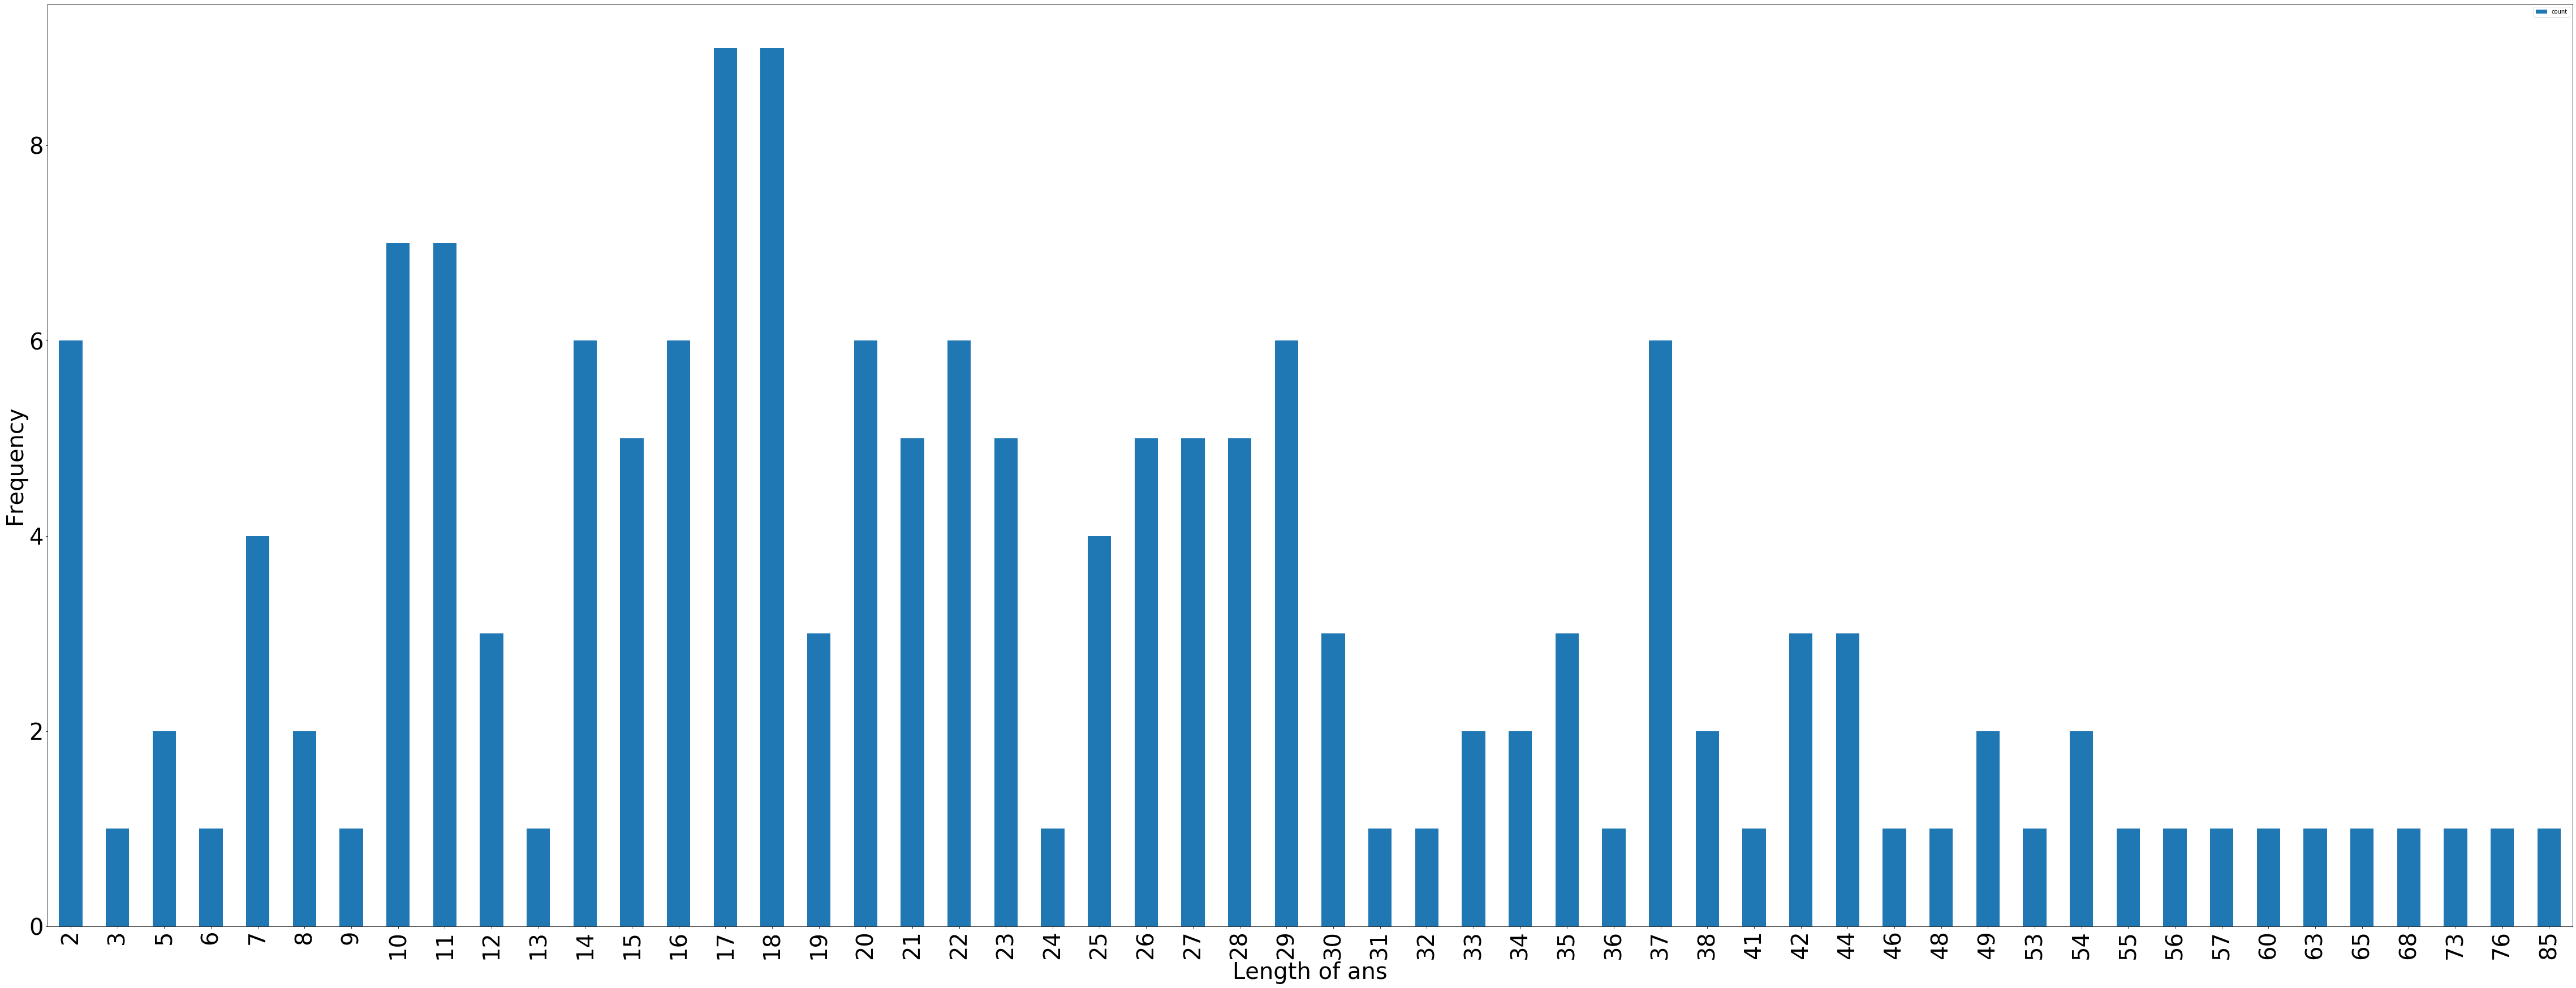

In [34]:
#Length Distribution of answers

ans_test = count_test["ans"].str.len()
x=np.sort(pd.unique(ans_test))
y=ans_test.value_counts().sort_values(ascending = False)
dy = y.to_frame().reset_index()
dy.columns = ['length','count']
dy.sort_values("length", axis = 0, ascending = True, 
                 inplace = True) 
dy = dy.reset_index().drop(['index'],axis=1)

print(dy.shape,"\nMin length of ans:",dy.iloc[0]['length']," frequency:",dy.iloc[0]['count'],"\nMax length of ans:",dy.iloc[53]['length']," frequency:",dy.iloc[53]['count'])

ax = dy.plot(x='length',y='count',kind="bar",figsize=(80,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})

Text(0, 0.5, 'Frequency')

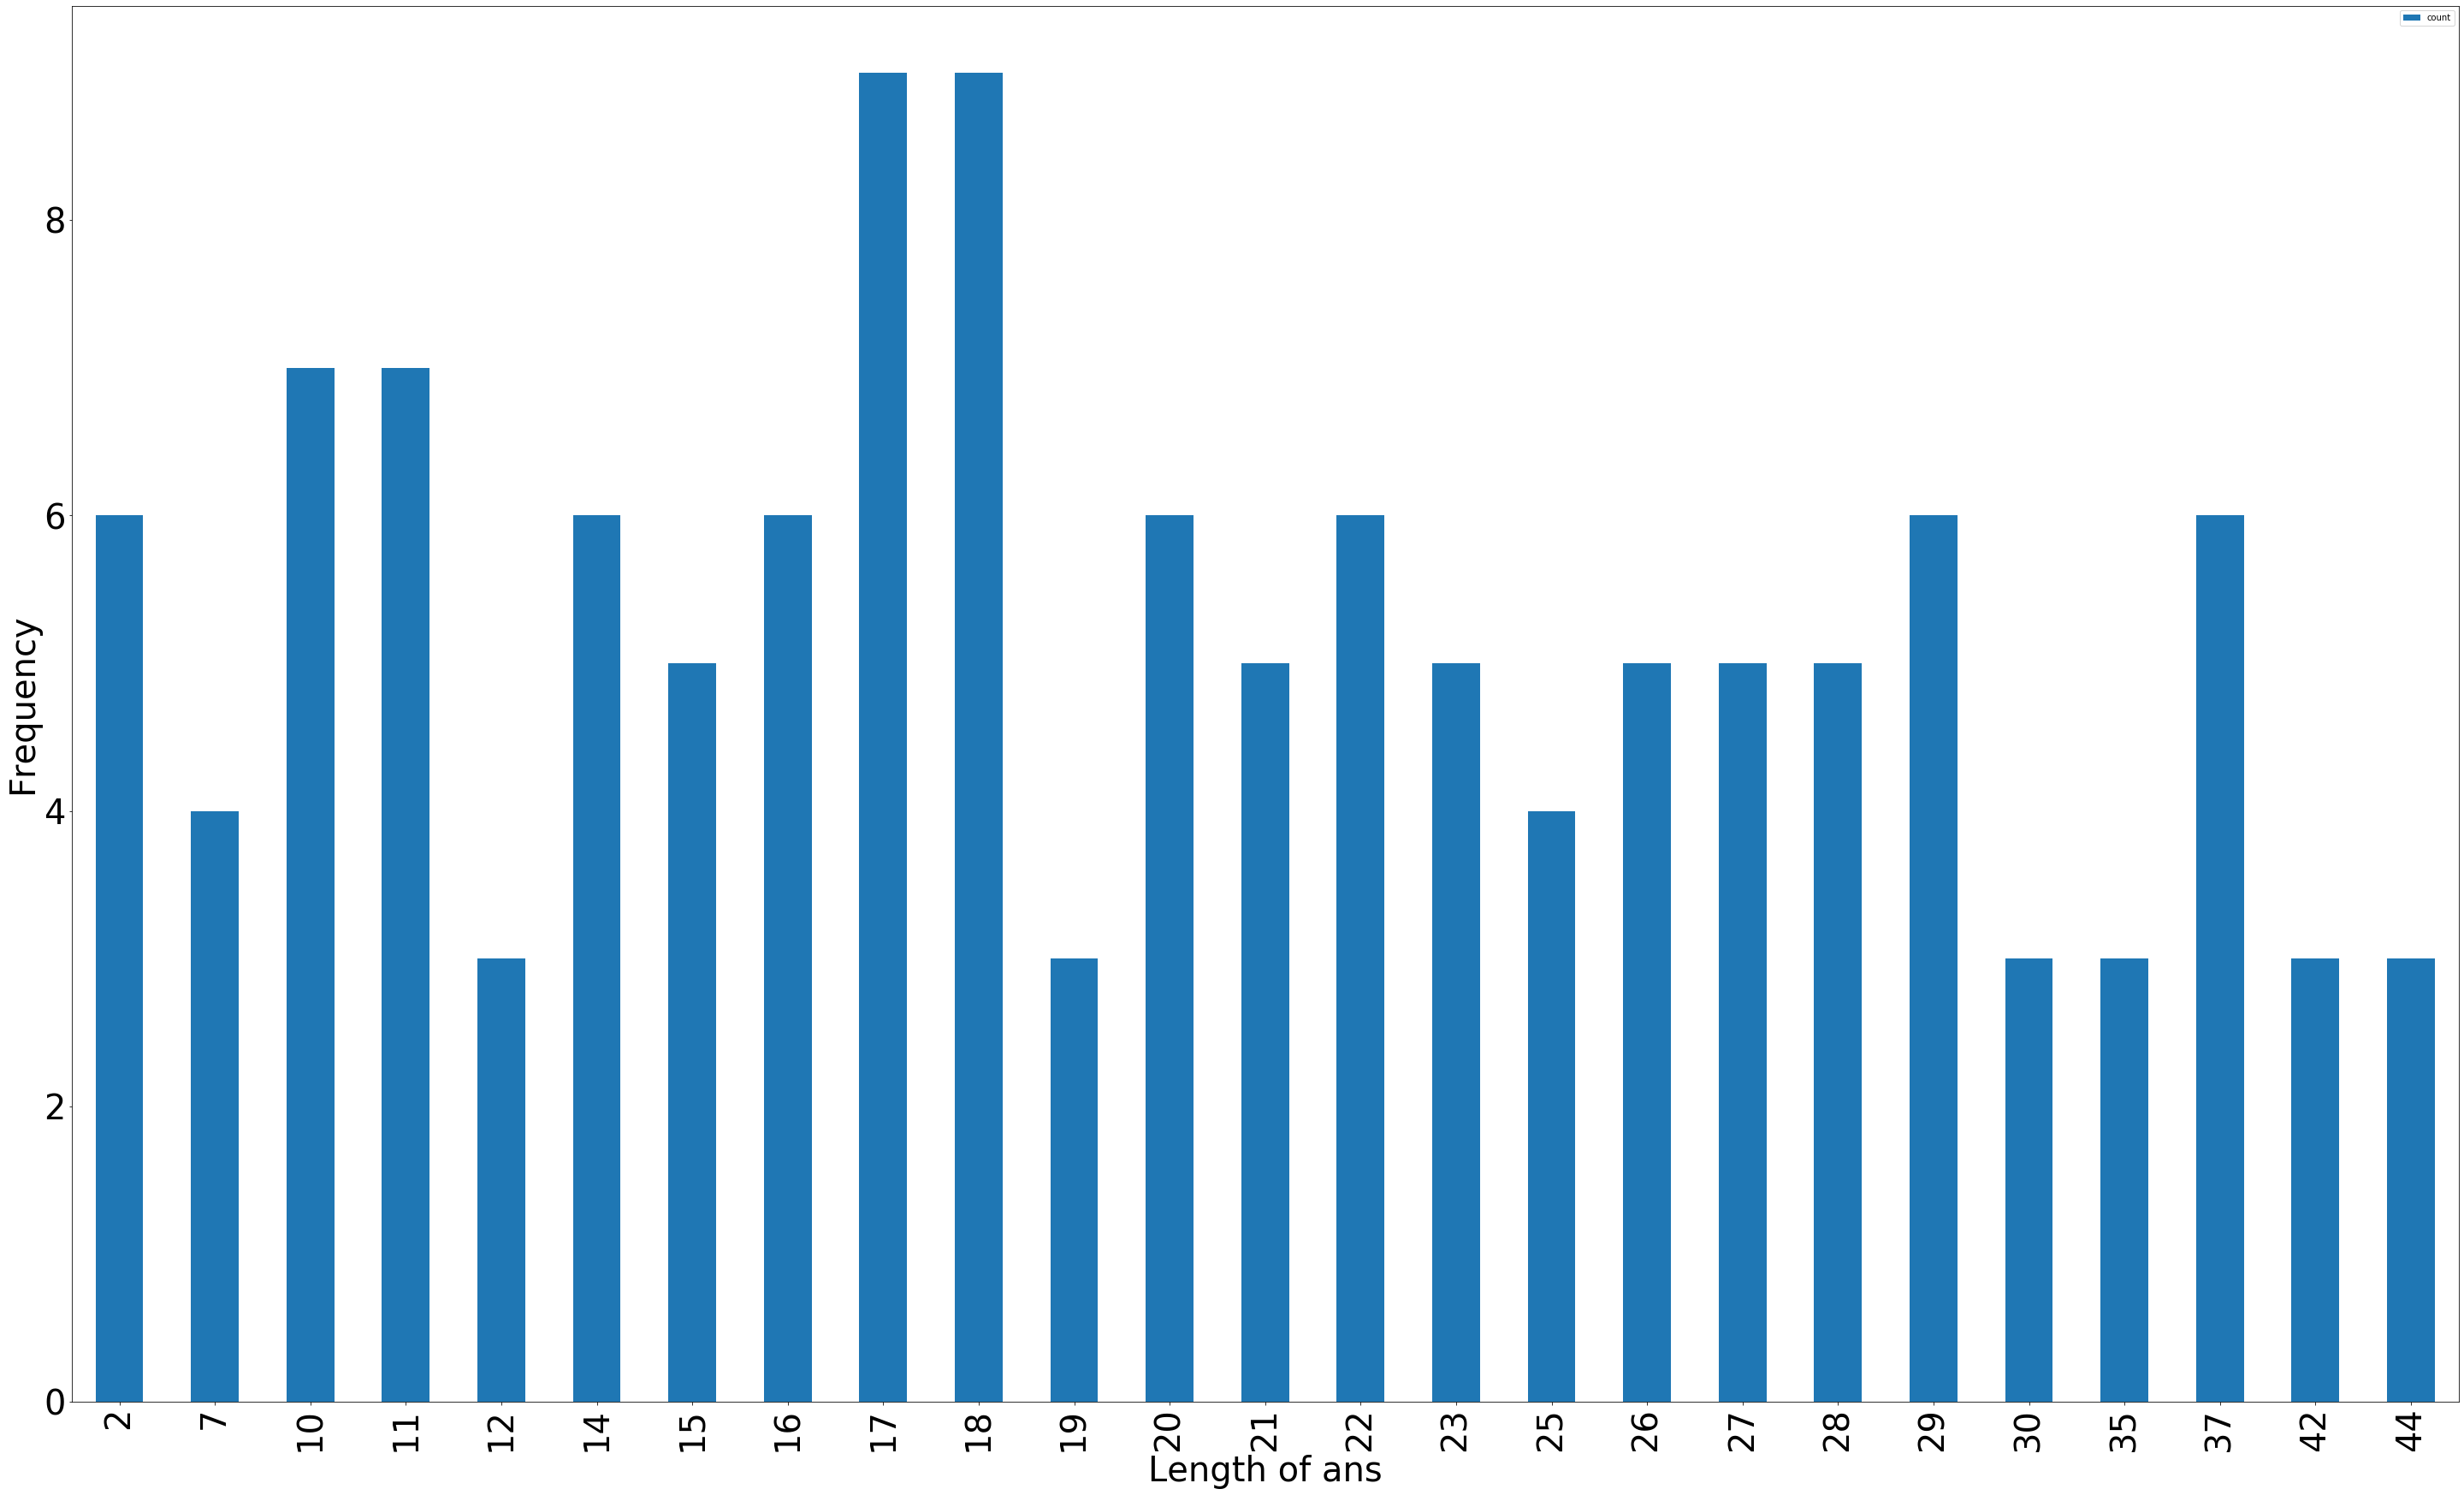

In [35]:
#Plot where freq of length is greater than 2
df3 = dy[dy['count'] > 2]
df3.shape

ax = df3.plot(x='length',y ='count', kind="bar",figsize=(50,30),fontsize=40)
ax.set_xlabel("Length of ans",fontdict={'fontsize':40})
ax.set_ylabel("Frequency",fontdict={'fontsize':40})